# Aprendizaje Supervisado - Regresión


## 1. Un atributo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import warnings
# warnings.filterwarnings("ignore")

In [2]:
n = 500
X = np.linspace(-2, 3, n)
y_real = 3*X - 2 #resultado real!

y = y_real + 1.0*np.random.randn(n)

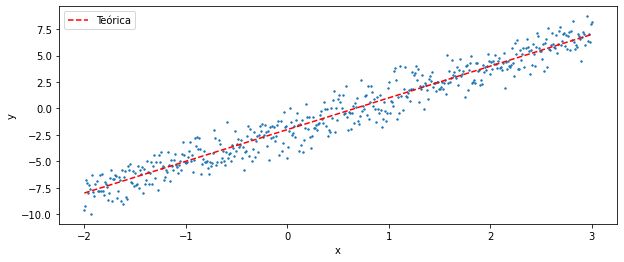

In [3]:
plt.figure(figsize=(10, 4))
plt.scatter(X,y, s = 2)
plt.plot(X, y_real, '--',label ='Teórica', c = 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Vamos a entrenar todos los modelos a la vez. Pero antes, no nos olvidemos del `train_test_split`

In [4]:
from sklearn.model_selection import train_test_split

X = X.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(350, 1) (350,) (150, 1) (150,)


Definimos los modelos y entrenamos

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=5)

In [6]:
linear_model.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train);

Veamos qué aprendieron.

La regresión lineal obtiene la pendiente y la ordenada al origen.

In [7]:
print(linear_model.coef_, linear_model.intercept_)

[3.08566781] -2.0039455985210513


¿Están cerca de los valores reales? 

Así como los clasificadores obtienen fronteras de decisión que separan los datos, los regresores obtienen curvas que intentan aproximar los datos lo mejor posible. Veamos cómo son estas curvas para cada regresor.

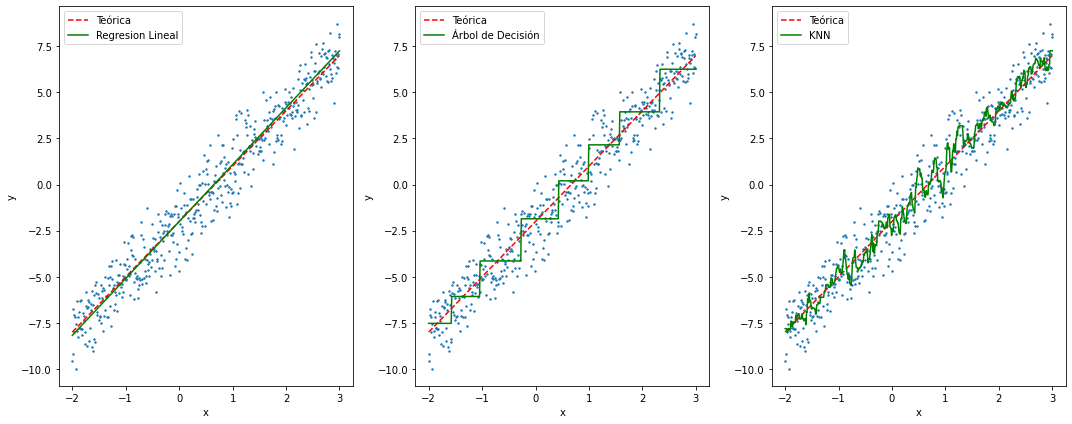

In [8]:
plt.figure(figsize = (15, 6))

plt.subplot(1, 3, 1)
plt.scatter(X, y, s=2)
plt.plot(X, y_real, '--', label='Teórica', c='r')
plt.plot(X, linear_model.predict(X), label='Regresion Lineal', c='g')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(X, y, s=2)
plt.plot(X, y_real, '--', label='Teórica', c='r')
plt.plot(X, tree_regressor.predict(X), label='Árbol de Decisión', c='g')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(X, y, s=2)
plt.plot(X, y_real, '--', label='Teórica', c='r')
plt.plot(X, knn_regressor.predict(X), label='KNN', c='g')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

Veamos ahora cómo son los errores obtenidos. Vamos a hacer todo en la misma celda, pero tiene tres componentes importantes:
1. El cálculo del RMSE (métrica elegida, podría ser otra) para cada conjunto (Train y Test).
1. Un gráfico de dispersión de $y$ vs $y_{predicted}$ para el conjunto de Test.
1. El histograma de los errores ($y - y_{predicted}$) para cada conjunto.

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 1.049210566715942
Raíz del error cuadrático medio en Test: 1.0925468032836132


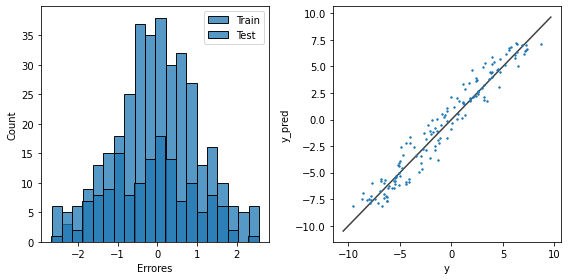

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 1.0474017370198931
Raíz del error cuadrático medio en Test: 1.2292041444937882


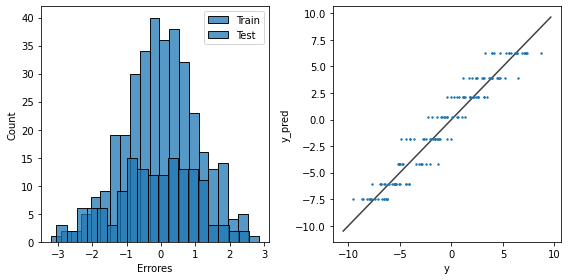

Modelo: KNN
Raíz del error cuadrático medio en Train: 0.9161401824573157
Raíz del error cuadrático medio en Test: 1.2226449075174635


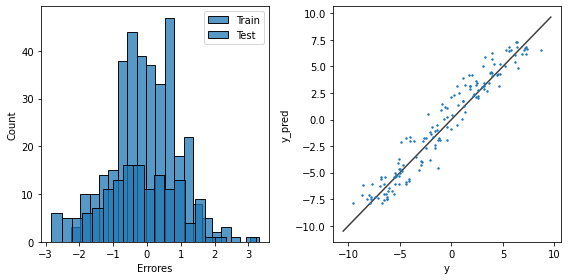

In [9]:
import seaborn as sns
from sklearn.metrics import mean_squared_error


modelos = ['Regresión lineal', 'Árbol de Decisión', 'KNN']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(y_train - y_train_pred, bins=20, label='Train')
    sns.histplot(y_test - y_test_pred, bins=20, label='Test')
    plt.xlabel('Errores')
    plt.legend()


    ax = plt.subplot(1, 2, 2)
    ax.scatter(y_test, y_test_pred, s=2)
    
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()])
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y')
    plt.ylabel('y_pred')
    
    plt.tight_layout()
    plt.show()

En todos los casos, ocurre algo parecido:
1. Los errores RMSE representan el error global del regresor. Son similares tanto para Test como para Train, indicando que no hay un gran sobreajuste.
1. Los histogramas de los errores son simétricos, aproximadamente Gaussianos, y parecidos para ambos conjuntos. Esto es un indicador de que estamos aproximando a nuestros datos de manera correcta.
1. En el gráfico $y$ vs $y_{predicted}$ para el conjunto de test, todos los puntos están cerca de la diagonal (la relación $y = x$), ¡que es lo que esperamos para un buen regresor! Además, el error parece ser similar en todo el rango de posibles valores. 


---

## 2. Dos atritutos

Ahora, replicaremos el mismo análisis, pero para una relación lineal con dos atributos, $y = -3x_1 + 2x_2 + 4$. Nuevamente, sumaremos algo de ruido para hacerlo más realista.

In [10]:
n = 500
x1 = np.random.rand(n)
x2 = np.random.rand(n)
y = 4 * x1 - 2 * x2 + 7 + 0.4 * np.random.randn(n)

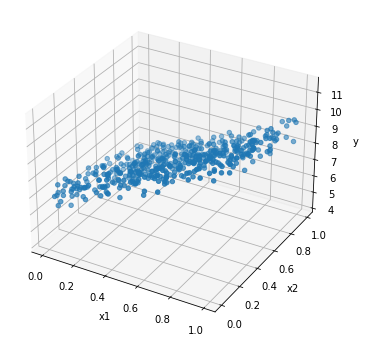

In [11]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_scatter(x1, x2, y, ax=None, fig=None):
    if (fig is None) and (ax is None):
        fig = plt.figure(figsize=(8,6))
        ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x1, x2, y)

    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')

plot_3d_scatter(x1, x2, y)

Creamos los atributos y hacemos un `train_test_split`

In [12]:
X = np.vstack((x1, x2)).T

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(350, 2) (350,) (150, 2) (150,)


Definimos los modelos y entrenamos

In [13]:
linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=2)

In [14]:
linear_model.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train);

Veamos qué aprendieron.

La regresión lineal obtiene **las pendientes** y la ordenada al origen

In [15]:
print(linear_model.coef_, linear_model.intercept_)

[ 3.99335663 -2.11614119] 7.0852073665718365


En este caso, la curva que aproxima a los datos no es más una recta, sino una superficie. La siguiente función nos ayuda a graficar.

In [16]:
from matplotlib import cm

def plot_3d_regressor(x1_min, x1_max, x2_min, x2_max, N, regressor, ax=None, fig=None):
    x1 = np.linspace(x1_min, x1_max, N) 
    x2 = np.linspace(x2_min, x2_max, N)
    X1, X2 = np.meshgrid(x1, x2)
    
    y = regressor.predict(np.array([X1.ravel(), X2.ravel()]).T)
    Y = y.reshape(X1.shape)
    
    if (fig is None) and (ax is None):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
    
    surf = ax.plot_surface(
        X1, X2, Y, cmap=cm.coolwarm,
        linewidth=0, antialiased=False, alpha=0.5
)

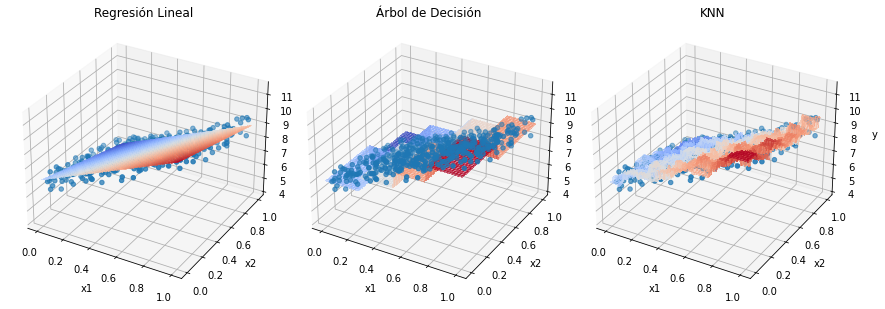

In [17]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(131, projection='3d')
plt.title('Regresión Lineal')
plot_3d_regressor(0, 1, 0, 1, 100, linear_model, ax, fig)
plot_3d_scatter(x1, x2, y, ax, fig)

ax = fig.add_subplot(132, projection='3d')
plt.title('Árbol de Decisión')
plot_3d_regressor(0, 1, 0, 1, 100, tree_regressor, ax, fig)
plot_3d_scatter(x1, x2, y, ax, fig)

ax = fig.add_subplot(133, projection='3d')
plt.title('KNN')
plot_3d_regressor(0, 1, 0, 1, 100, knn_regressor, ax, fig)
plot_3d_scatter(x1, x2, y, ax, fig)

plt.tight_layout()
plt.show()

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 0.4010178339363649
Raíz del error cuadrático medio en Test: 0.367240684870816


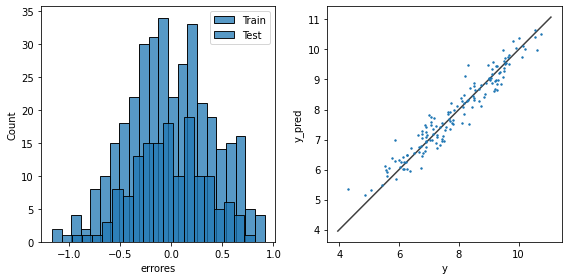

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 0.509871389764608
Raíz del error cuadrático medio en Test: 0.5960958750072742


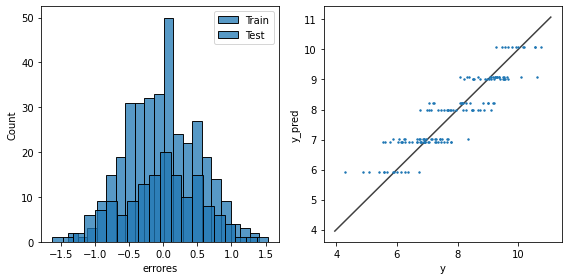

Modelo: KNN
Raíz del error cuadrático medio en Train: 0.27594541361005254
Raíz del error cuadrático medio en Test: 0.49366929916626817


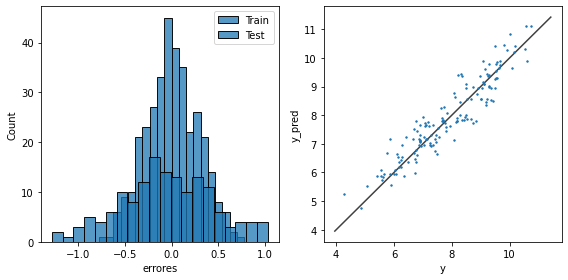

In [18]:
import seaborn as sns
from sklearn.metrics import mean_squared_error


modelos = ['Regresión lineal', 'Árbol de Decisión', 'KNN']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {modelos[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(y_train - y_train_pred, bins=20, label='Train')
    sns.histplot(y_test - y_test_pred, bins=20, label='Test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()])
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y')
    plt.ylabel('y_pred')
    
    plt.tight_layout()
    plt.show()